In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl

sys.path.append('..')
from env_config import DATA_PATH
from utils import *
from data_lotss import *
from data_cmb import *
from cosmology import *
from plotting import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='whitegrid')
pd.set_option('mode.chained_assignment', None)

# Parameters

In [4]:
nside = 512
lotss_flux_min_cut = 2  # mJy

# Data

In [5]:
lotss_data = get_lotss_hetdex_data()

# should remain 57,928
lotss_counts_map, lotss_mask, lotss_noise_map = get_lotss_hetdex_map(lotss_data, nside=nside)

cmb_lensing_map, cmb_lensing_mask = get_cmb_lensing_map(nside=nside, fwhm=math.radians(0.8))

../data_lotss.py:62: TableReplaceWarning: converted column 'objID' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:62: TableReplaceWarning: converted column 'nfilt_eazy' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:62: TableReplaceWarning: converted column 'nfilt_atlas' from integer to float
  data = read_fits_to_pandas(data_path)
../data_lotss.py:62: TableReplaceWarning: converted column 'nfilt_cosmos' from integer to float
  data = read_fits_to_pandas(data_path)


Original LoTSS hetdex datashape: (318520, 143)
Redshift available: (162252, 143)
Total flux of S > 2mJy: (27531, 143)
S/N > 5: (27481, 143)


../utils.py:74: RuntimeWarning: invalid value encountered in true_divide
  mean_map /= n_obj_map
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/

In [6]:
lotss_noise_weight_map = get_lotss_noise_weight_map(lotss_noise_map, lotss_mask, lotss_flux_min_cut, nside)
lotss_overdensity_map = get_overdensity_map(lotss_counts_map, lotss_mask, lotss_noise_weight_map)

Flux probability integral error: 0.0258
d flux: 1.9051 (mJy)


  0%|          | 0/786432 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, y

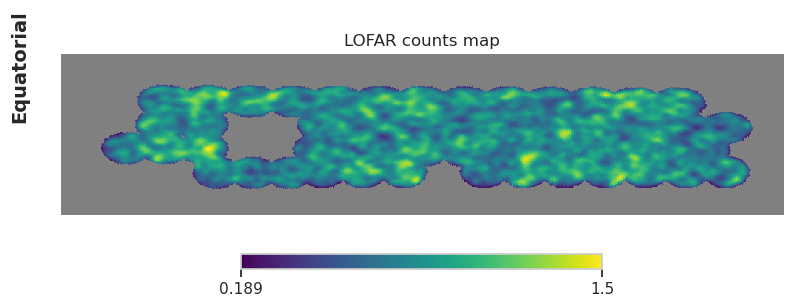

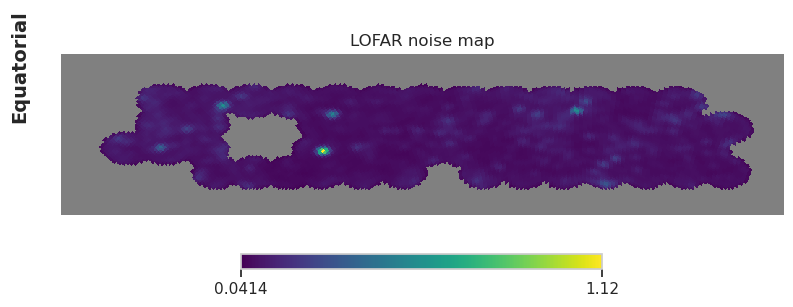

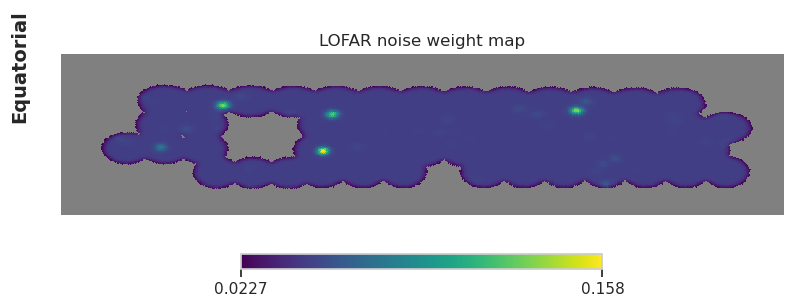

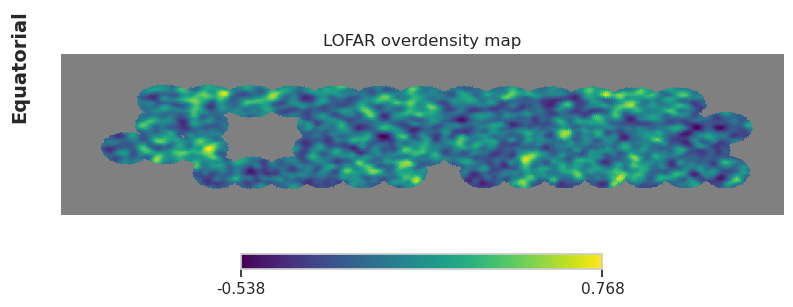

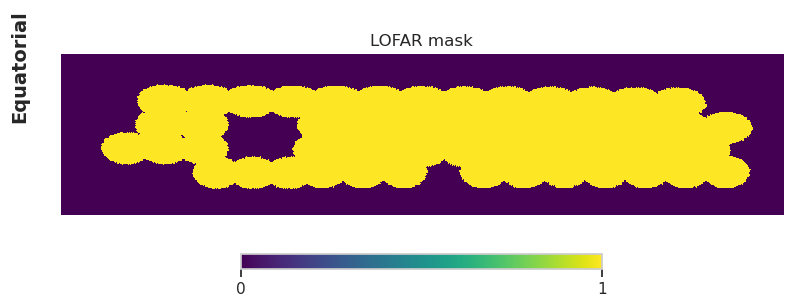

In [7]:
plot_hetdex_image(lotss_counts_map, title='LOFAR counts map', fwhm=math.radians(0.6))
plot_hetdex_image(lotss_noise_map, title='LOFAR noise map', fwhm=math.radians(0.6))
plot_hetdex_image(lotss_noise_weight_map, title='LOFAR noise weight map', fwhm=math.radians(0.6))
plot_hetdex_image(lotss_overdensity_map, title='LOFAR overdensity map', fwhm=math.radians(0.6))
plot_hetdex_image(lotss_mask, title='LOFAR mask')

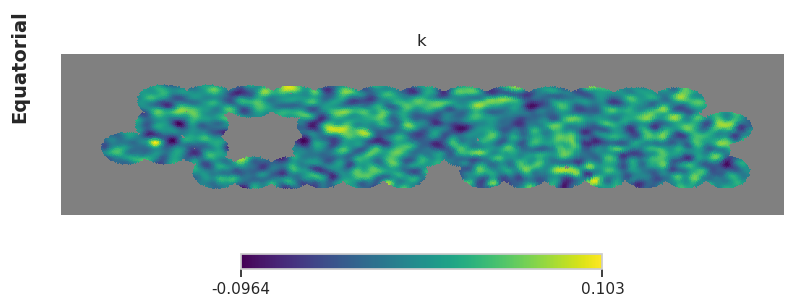

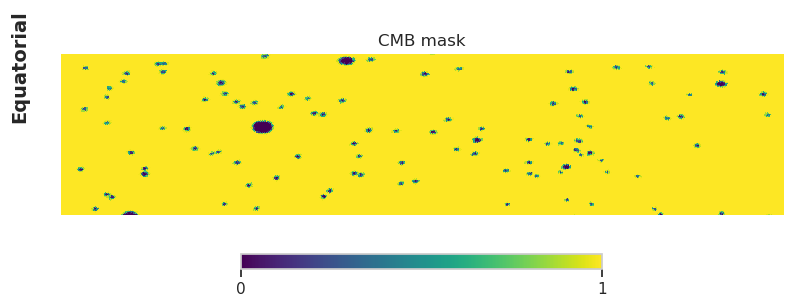

In [8]:
plot_hetdex_image(cmb_lensing_map, lotss_mask, title='k', fwhm=0)
plot_hetdex_image(cmb_lensing_mask, title='CMB mask')

# Power spectra

In [9]:
bias = 2.1
z_tail = 2.0

z_arr, n_arr = get_lotss_redshift_distribution(z_tail=z_tail)
l_arr = np.arange(2, 3 * nside + 2)
# l_arr = np.array([binning.get_ell_list(i) for i in range(binning.get_n_bands())]).flatten()
gg_theory, gk_theory, kk_theory = get_theory_correlations(l_arr, z_arr, n_arr, bias, scale_bias=True)

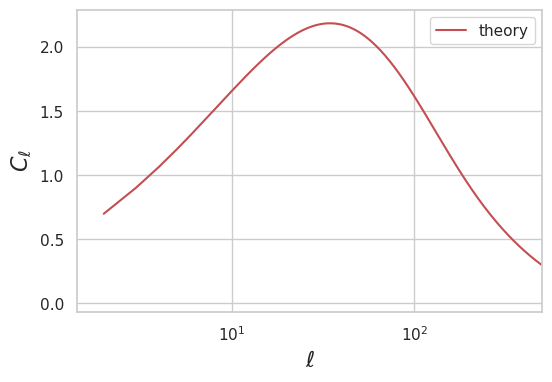

In [10]:
tmp = [math.pow(10, 7) * kk_theory[i] for i in range(len(l_arr))]

plt.plot(l_arr, tmp, 'r', label='theory', markersize=2)

plt.xscale('log')
plt.yscale('linear')
plt.xlim(xmax=500)
# plt.ylim(ymin=y_min)
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

In [11]:
# LoTSS x CMB lensing cross correlation
ells_per_bandpower = 50
l_max = None
mask_aposize = None

lotss_field, cmb_k_field, gg_coupled, gg_decoupled, gg_workspace, gk_coupled, gk_decoupled, gk_workspace, kk_coupled, kk_decoupled, kk_workspace, binning, shot_noise = \
    get_data_correlations(lotss_counts_map, lotss_overdensity_map, lotss_mask, cmb_lensing_map, cmb_lensing_mask, nside, ells_per_bandpower=ells_per_bandpower, with_shot_noise=True, mask_aposize=mask_aposize, l_max=l_max)

In [12]:
shot_noise

4.687437466043214e-06

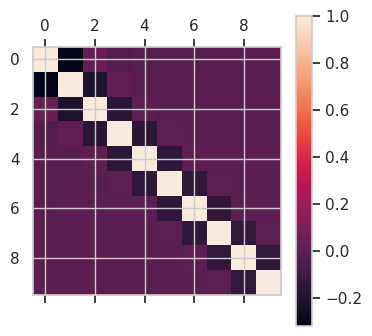

In [13]:
covariance_gg_gg = get_covariance_matrix(lotss_field, lotss_field, lotss_field, lotss_field, gg_theory, gg_theory, gg_theory, gg_theory, gg_workspace, gg_workspace)
correlation_gg_gg = get_correlation_matrix(covariance_gg_gg)

plt.matshow(correlation_gg_gg[:10, :10])
plt.colorbar()

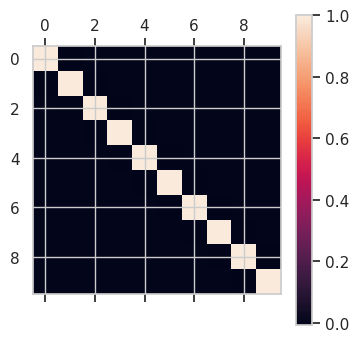

In [14]:
covariance_gk_gk = get_covariance_matrix(lotss_field, cmb_k_field, lotss_field, cmb_k_field, gg_theory, gk_theory, gk_theory, kk_theory, gk_workspace, gk_workspace)
correlation_gk_gk = get_correlation_matrix(covariance_gk_gk)

plt.matshow(correlation_gk_gk[:10, :10])
plt.colorbar()

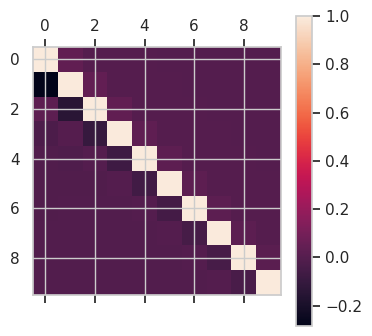

In [15]:
covariance_gg_gk = get_covariance_matrix(lotss_field, lotss_field, lotss_field, cmb_k_field, gg_theory, gk_theory, gg_theory, gk_theory, gg_workspace, gk_workspace)
correlation_gg_gk = get_correlation_matrix(covariance_gg_gk)

plt.matshow(correlation_gg_gk[:10, :10])
plt.colorbar()

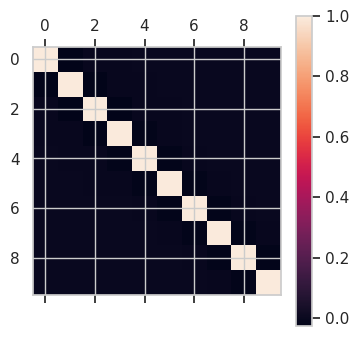

In [16]:
covariance_kk_kk = get_covariance_matrix(cmb_k_field, cmb_k_field, cmb_k_field, cmb_k_field, kk_theory, kk_theory, kk_theory, kk_theory, kk_workspace, kk_workspace)
correlation_kk_kk = get_correlation_matrix(covariance_kk_kk)

plt.matshow(correlation_kk_kk[:10, :10])
plt.colorbar()

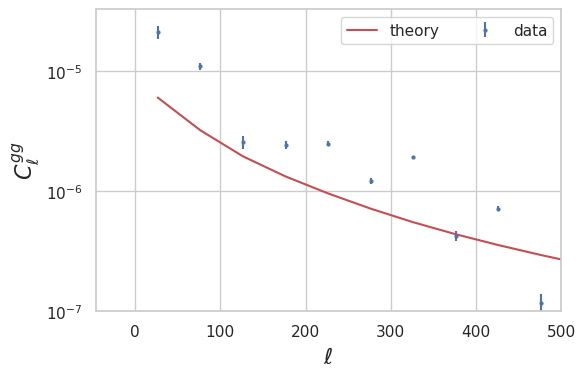

1553.674537733087

In [17]:
# Sparse z bins, custom discrete distribution
# gg_theory_binned = binning.bin_cell(gg_theory)
gg_theory_binned = gg_workspace.decouple_cell(gg_workspace.couple_cell([gg_theory]))[0]
plot_correlation(binning, gg_decoupled, model_correlation=gg_theory_binned, covariance_matrix=covariance_gg_gg, x_max=500, y_min=10e-8, x_scale='linear', y_scale='log', label='gg')
get_chi_squared(gg_decoupled[:10], gg_theory_binned[:10], covariance_gg_gg[:10, :10])

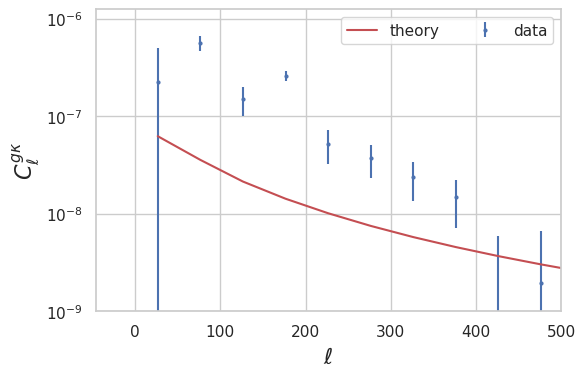

119.71647229852523

In [18]:
# Sparse z bins, custom discrete distribution
gk_theory_binned = gk_workspace.decouple_cell(gk_workspace.couple_cell([gk_theory]))[0]
plot_correlation(binning, gk_decoupled, model_correlation=gk_theory_binned, covariance_matrix=covariance_gk_gk, x_max=500, y_min=10e-10, x_scale='linear', y_scale='log', label='g\kappa')
get_chi_squared(gk_decoupled[:10], gk_theory_binned[:10], covariance_gk_gk[:10, :10])

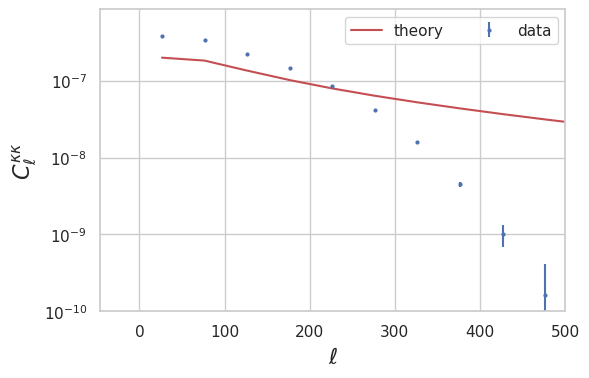

49951.396717842545

In [19]:
# Sparse z bins, custom discrete distribution
kk_theory_binned = kk_workspace.decouple_cell(kk_workspace.couple_cell([kk_theory]))[0]
plot_correlation(binning, kk_decoupled, model_correlation=kk_theory_binned, covariance_matrix=covariance_kk_kk, x_max=500, y_min=10e-11, x_scale='linear', y_scale='log', label='\kappa\kappa')
get_chi_squared(kk_decoupled[:10], kk_theory_binned[:10], covariance_kk_kk[:10, :10])

# Likelihood inference

In [21]:
filename = 'test.h5'

# Tuples of mean value and scale of starting variations
starting_params = {'bias': (2.1, 0.1), 'sigma8': (0.83, 0.05)}
default_params = {'bias': 2.1, 'sigma8': 0.83, 'z_tail': 2.0}

n_walkers = 8
n_ells = 10
icov = np.linalg.inv(covariance_gg_gg)[:n_ells, :n_ells]
data = gg_decoupled[:n_ells]
ells = binning.get_effective_ells()[:n_ells]

In [ ]:
p0_walkers = get_walkers_starting_params(starting_params, n_walkers)
arg_names = list(starting_params.keys())

sampler = init_emcee_sampler(p0_walkers, arg_names, get_log_prob, default_params, ells, data, icov, filename)

autocorr_time_arr = run_emcee(sampler, p0_walkers, 5000, autocorr_time_arr=None, reset=False, progress='notebook')

  0%|          | 0/5000 [00:00<?, ?it/s]

Iteration: 100, tau: [11.57517984 12.01885006], tau change: [0.00700676 0.03016642]


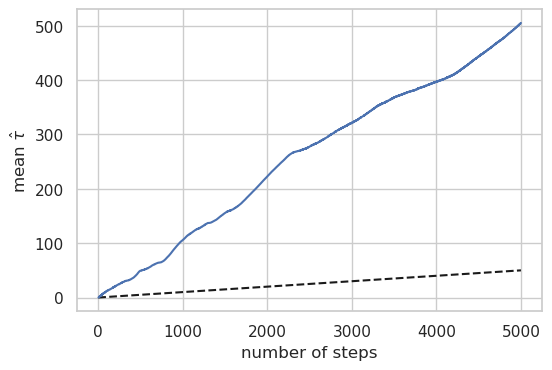

In [24]:
import matplotlib.pyplot as plt

n = np.arange(1, len(autocorr_time_arr) + 1)
plt.plot(n, n / 100.0, '--k')
plt.plot(n, autocorr_time_arr)
plt.xlabel('number of steps')
plt.ylabel(r'mean $\hat{\tau}$');

In [25]:
print('Mean acceptance fraction: {}'.format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.2506


In [ ]:
import corner

tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = sampler.get_chain(discard=burnin, flat=True, thin=thin)
log_prob_samples = sampler.get_log_prob(discard=burnin, flat=True, thin=thin)
log_prior_samples = sampler.get_blobs(discard=burnin, flat=True, thin=thin)

print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))
print("flat log prior shape: {0}".format(log_prior_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None], log_prior_samples[:, None]), axis=1
)

labels = list(map(r"$\theta_{{{0}}}$".format, range(1, ndim + 1)))
labels += ["log prob", "log prior"]

corner.corner(all_samples, labels=labels);

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


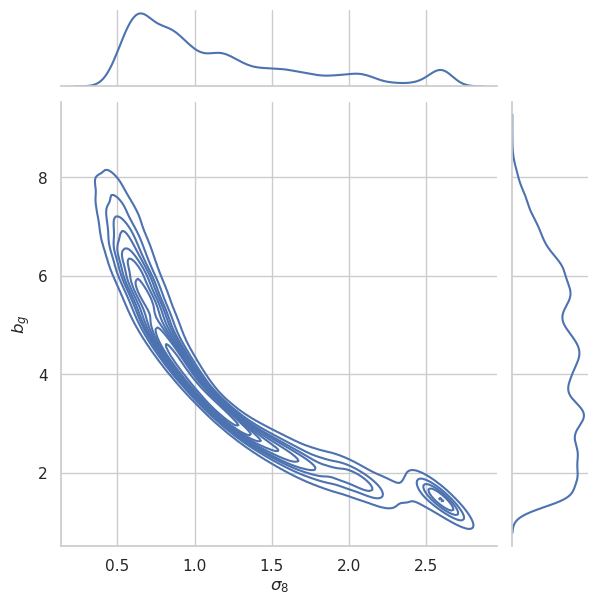

In [26]:
samples = sampler.get_chain(flat=True)
sns.jointplot(samples[:, 1], samples[:, 0], kind='kde', stat_func=None).set_axis_labels(r'$\sigma_8$', r'$b_g$')

In [ ]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))